# Introduction
By exploring the crash related dataset, are we able to find out some interesting stories. We are especially curious about what features are correlated with each other, for example, is there any features caused injury in the accidents? Will drinking become a vital issue that cause fatal accidents? Also, we are interested in finding out the different problems exist in various neighborhoods in Pittsburgh and if the income conditions in different neighborhoods cause those problems. Finding out the problems can be quite helpful in developming our city’s traffic conditions.In this example,we analyze accidents happened at hill districts to show the process of crash dataset use.

# Crash Dataset
The crash dataset contains information about crash incidents that happened in Allegheny County from 2004 to 2017. Our final datasets include 11 attributes.

In [1]:
from pandas import read_excel
crashes_description = read_excel('crash_desc.xlsx')
crashes_description

,Column Name,Description,Codes
0,AGGRESSIVE,Aggressive Driving Indicator,"0 = No, 1 = Yes"
1,SPEEDING,Speeding Related Indicator,"0 = No, 1 = Yes"
2,ALCOHOL,Alcohol Related Indicator,"0 = No, 1 = Yes"
3,DISTRACTED,Distracted Driver Indicator,"0 = No, 1 = Yes"
4,ICY_ROAD,Icy Road Indicator,"0 = No, 1 = Yes"
5,WET_ROAD,Wet Road Indicator,"0 = No, 1 = Yes"
6,SNOW_SLUSH_ROAD,Snow Slush Road Indicator,"0 = No, 1 = Yes"
7,DARK,Illumination Indicates that the Crash Scene Li...,"0 = No, 1 = Yes"
8,INTERSECTION,Intersection Indicator,"0 = No, 1 = Yes"
9,SIGNAL,Signal Indicator,"0 = No, 1 = Yes"


# Data Preprocessing
We used ArcMap, a component of ArcGIS, to extract the data points in hill district using a shape file that contains the City of Pittsburgh neighborhoods. This approach is efficient as it requires less processing time and accurately finds the data points that are situated in each neighborhood. The following screenshots show three main stages to extract the data points in the three neighborhoods. 

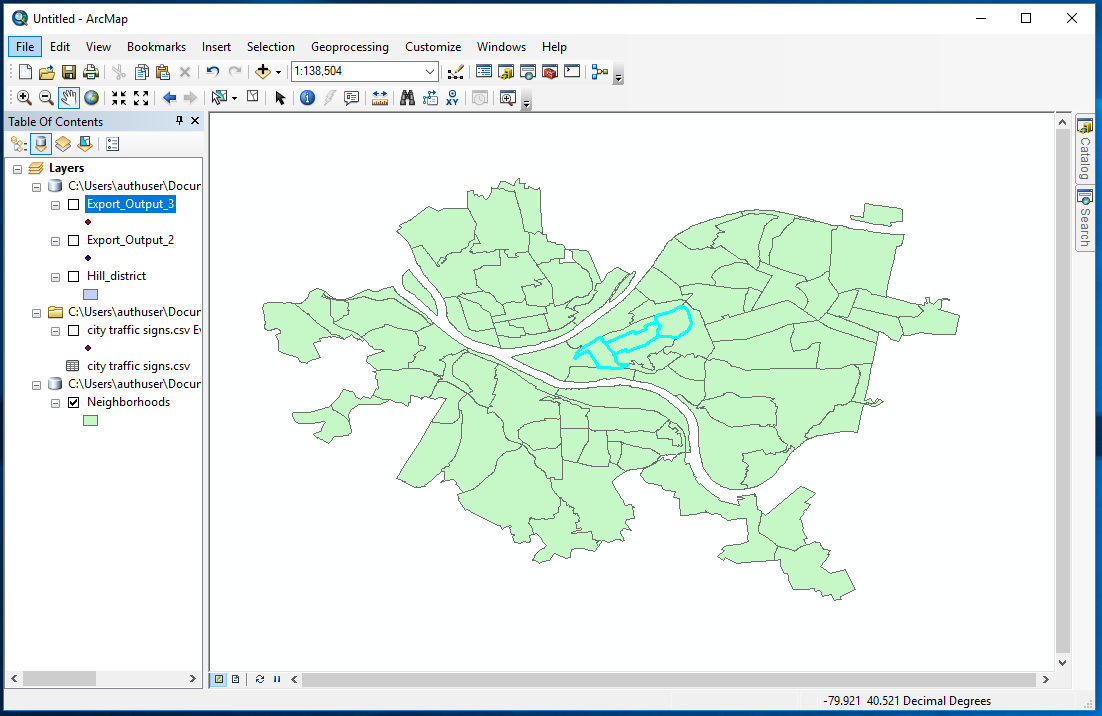

In [2]:
from IPython.display import Image
Image(filename='arcmap1.png')

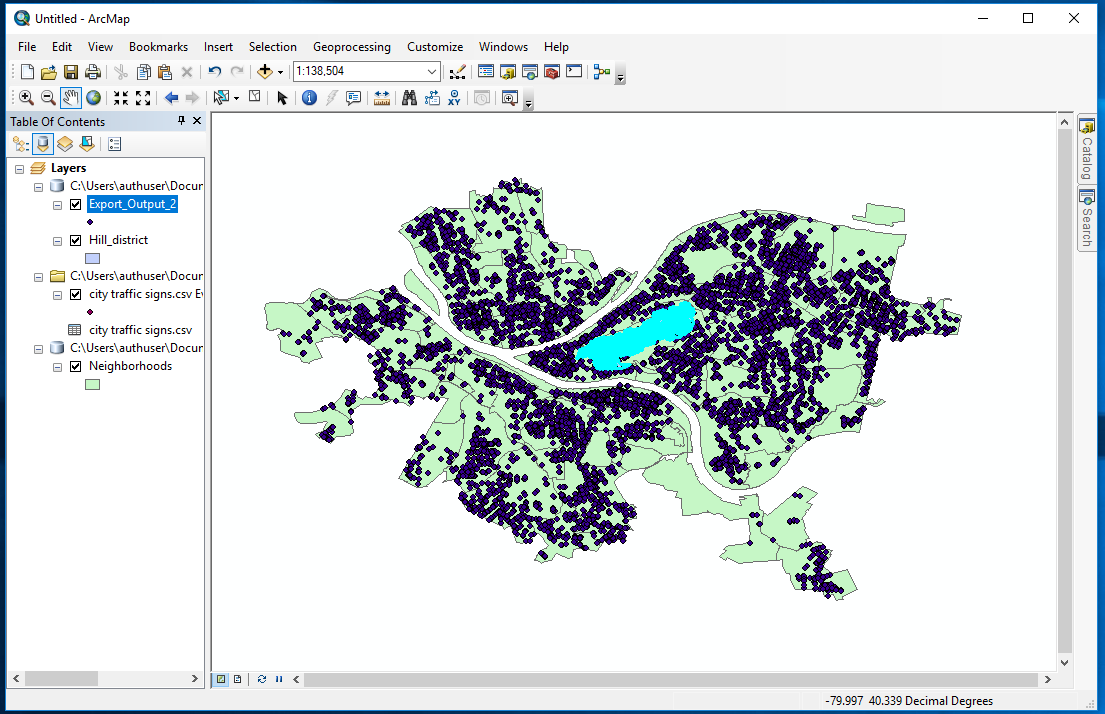

In [3]:
Image(filename='arcmap2.png')

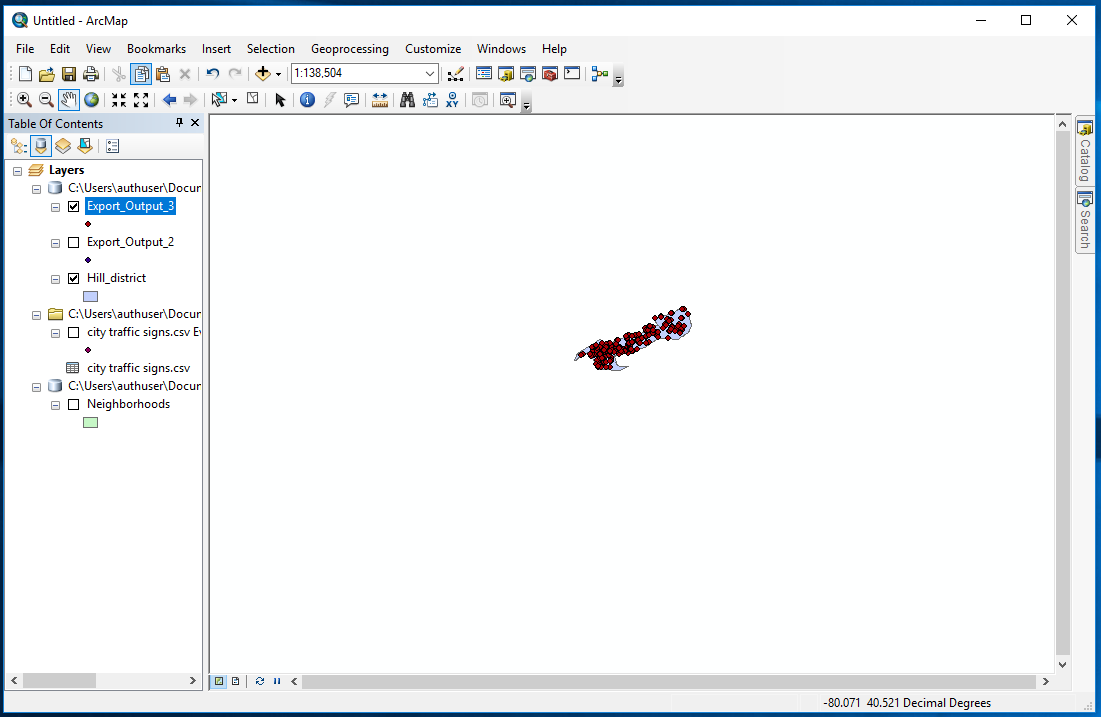

In [4]:
Image(filename='arcmap3.png')

# Data Analysis
Association rule learning is a rule-based machine learning method for discovering interesting relationships between variables in large databases. Its ultimate goal is using the machine to mimic the human brain’s feature extraction and abstract association capabilities from new uncategorized data. It was introduced for discovering regularities between products in large-scale transaction data recorded by Point-of-sale(POS) systems in supermarkets. For example, the rule {eggs,onions}->{meat} found in the sales data of supermarket might indicate that if the customers buy eggs and onions together, they are likely to buy meat to make burger.

The best known constrains to select interesting rules from set of all possible rules are minimum thresholds on support and confidence. The minimum support threshold and the minimum confidence threshold are specified by the users.There are three common ways to measure association.

**Support** indicates how frequently the itemset appears in the dataset. It is calculated as the proportion of the transactions in the dataset which contains the itemset.

**Confidence** indicated how likey item Y is purchased when item X is purchased, expressed as {X->Y}. It is calculated by the proportion of transections with item X, in which item Y also appears like conf(X->Y)=supp(X∪Y)/supp(X). One drawback of the confidence measure is that it might misrepresent the importance of an association because it only accounts for how popular X are, but not Y. So to account for the base popularity of both constituent items, we use a third measure called lift.

**Lift** is defined as: lift(X->Y)=supp(X∪Y)/(supp(X)*supp(Y)).It can be interpreted as the deviation of the support of the whole rule from the support expected under independence given the supports of the LHS and the RHS. Greater lift means stronger associations. If the lift is >1, the two occurrences are dependent on each other. If the lift is =1, it means possibly the two events are independent of each other, no rule can be drawn involving those two events.

In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import random
import matplotlib.pyplot as plt

In [6]:
crashes_hills = read_excel('hills.xlsx')
df_crash_hill = pd.DataFrame(crashes_hills)

from mlxtend.frequent_patterns import apriori
frequency_hill = apriori(df_crash_hill, min_support=0.075, use_colnames=True)

association_rules(frequency_hill, metric="confidence", min_threshold=1.0)
rules = association_rules(frequency_hill, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(AGGRESSIVE),(SPEEDING),0.346667,0.128333,0.128333,0.370192,2.884615,0.083844,1.384020
1,(SPEEDING),(AGGRESSIVE),0.128333,0.346667,0.128333,1.000000,2.884615,0.083844,inf
2,(AGGRESSIVE),(INTERSECTION),0.346667,0.555000,0.250000,0.721154,1.299376,0.057600,1.595862
3,(INTERSECTION),(AGGRESSIVE),0.555000,0.346667,0.250000,0.450450,1.299376,0.057600,1.188852
4,(AGGRESSIVE),(INJURY),0.346667,0.423333,0.148333,0.427885,1.010751,0.001578,1.007955
5,(INJURY),(AGGRESSIVE),0.423333,0.346667,0.148333,0.350394,1.010751,0.001578,1.005737
6,(AGGRESSIVE),(STOPSIGN),0.346667,0.133333,0.075000,0.216346,1.622596,0.028778,1.105930
7,(STOPSIGN),(AGGRESSIVE),0.133333,0.346667,0.075000,0.562500,1.622596,0.028778,1.493333
8,(ALCOHOL),(DARK),0.091667,0.420000,0.078333,0.854545,2.034632,0.039833,3.987500
9,(DARK),(ALCOHOL),0.420000,0.091667,0.078333,0.186508,2.034632,0.039833,1.116585


Visualize support and confidence

D:\Users\Administrator.USER-20170206GP\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
D:\Users\Administrator.USER-20170206GP\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


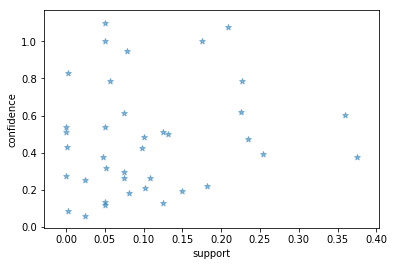

In [7]:
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

for i in range (len(support)):
   support[i] = support[i] + 0.025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

If we choose consequent to be "**injury**", the rules show as below(using arulesviz in R):

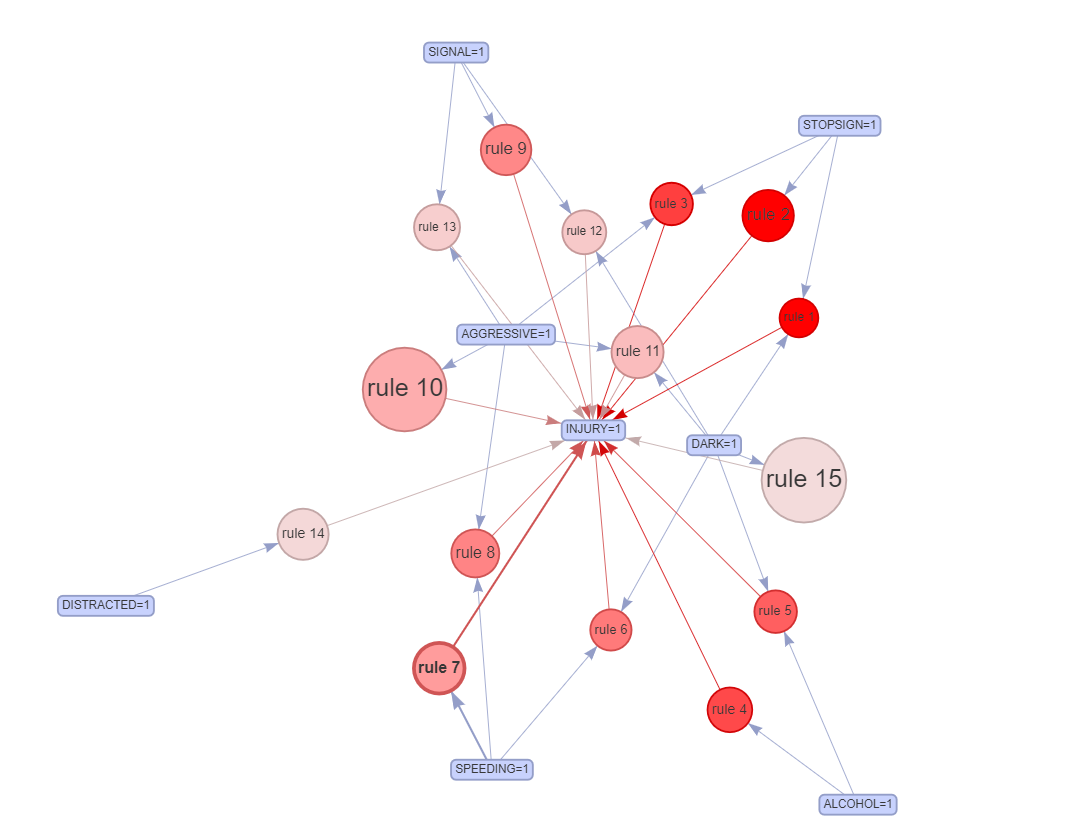

In [8]:
Image(filename='aruleviz.png')

# Result
As the higher lift means the stronger positive correlation, speeding is closely related to aggresive drivers. Also, it seems that the injury often happen when the illumination is dark as well as the driver is at the intersection. We can also find "alcohol" and "dark" have a high lift, which means drivers probably drink at night.